## Exploring Fancy Indexing

In [1]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100,size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
#suppose we want to access three dirrerent elements. we could do it like this
[x[3],x[7],x[2]]

[71, 86, 14]

In [3]:
# or we could do it like this
ind = [3,4,7]
x[ind]

array([71, 60, 86])

In [4]:
#fancy indexing reflects the shape of the index arrays rather than the shape of the array being indexed
ind = np.array([[3,7],
               [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [7]:
#combining column vector within the indices, we get a two-dimensional result
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

####  Combined Indexing

In [9]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
X[2,[2,0,1]]

array([10,  8,  9])

In [11]:
mask = np.array([1,0,1,0], dtype=bool)
X[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Selecting random points

In [12]:
mean = [0,0]
cov = [[1,2],
      [2,5]]
X = rand.multivariate_normal(mean,cov,100)
x.shape

(10,)

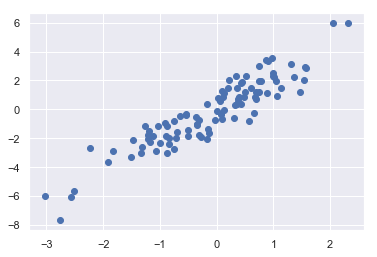

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plotting styling
plt.scatter(X[:,0],X[:,1]);

In [14]:
#lets select 20 random points. We'll do this by first choosing 20 random points with no repeats
indices = np.random.choice(X.shape[0],20,replace=False)
indices


array([ 1, 41,  5,  6, 84, 58, 62, 19, 51,  3, 70, 95, 46, 98, 21, 22, 17,
       43,  9, 75])

In [15]:
selection = X[indices]
selection.shape

(20, 2)

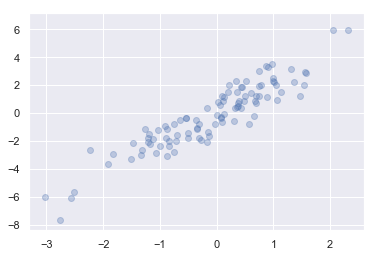

In [16]:
# to see the selected points lets over-plot large circles at the location of the selected points
plt.scatter(X[:,0], X[:,1], alpha=0.3,)
plt.scatter(selection[:,0],selection[:,1],facecolor='none',s=200);

#### Modifying values with fancy indexing

In [17]:
x = np.arange(10)
i = np.array([2,1,8,4])
print(x)
x[i]=99
print(x)

[0 1 2 3 4 5 6 7 8 9]
[ 0 99 99  3 99  5  6  7 99  9]


In [18]:
x[1]-=10
print(x)

[ 0 89 99  3 99  5  6  7 99  9]


In [19]:
i = [2,3,3,4,4,4]
x[i] +=1
x

array([  0,  89, 100,   4, 100,   5,   6,   7,  99,   9])

In [20]:
x = np.zeros(10)
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


#### Binning Data

In [21]:
np.random.seed(42)
x = np.random.randn(100)
#compute a histogram by hand
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

#find the appropriate bin for each x
i = np.searchsorted(bins,x)

# add 1 to each of these bins
np.add.at(counts,i,1)

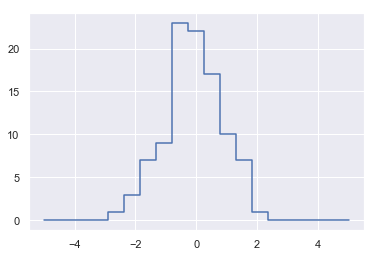

In [22]:
plt.plot(bins,counts,linestyle="steps");

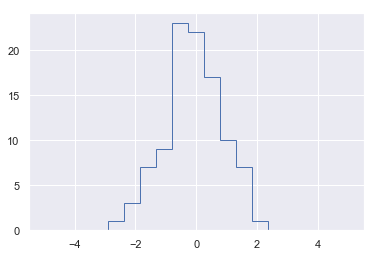

In [23]:
plt.hist(x,bins,histtype='step');

In [26]:
print("Numpy routine:")
%timeit counts,edges=np.histogram(x,bins)
print("Custom routine:")
%timeit np.add.at(counts,np.searchsorted(bins,x),1)

Numpy routine:
18.6 µs ± 484 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Custom routine:
11.1 µs ± 240 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
